<a href="https://colab.research.google.com/github/erdikose/medical_cost_analysis/blob/main/fifa23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset"
od.download(dataset_url)
# note to self: your kaggle account's password is not your kaggle key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: erdikose
Your Kaggle Key: ··········


100%|██████████| 2.25M/2.25M [00:00<00:00, 2.72MB/s]


In [ ]:
fifa_players = pd.read_csv("fifa-23-players-dataset/Fifa 23 Players Data.csv")

In [ ]:
print(f"Shape of the data before removing duplicated rows: {fifa_players.shape}")
fifa_players.drop_duplicates(inplace=True)
print(f"Shape of the data after removing duplicated rows: {fifa_players.shape}")

Shape of the data before removing duplicated rows: (18539, 89)
Shape of the data after removing duplicated rows: (18420, 89)


In [ ]:
fifa_players.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [ ]:
cols = ["Known As", "Overall", "Potential", "Best Position",
        "Nationality", "Age", "Club Name", "Preferred Foot", 
        "Attacking Work Rate", "Defensive Work Rate"]

# in FIFA 23, there are 6 major attributes for players:
attr = [x for x in fifa_players.columns if " Total" in x]
attr

['Pace Total',
 'Shooting Total',
 'Passing Total',
 'Dribbling Total',
 'Defending Total',
 'Physicality Total']

In [ ]:
fifa = fifa_players[cols + attr].copy()
fifa.head()

,Known As,Overall,Potential,Best Position,Nationality,Age,Club Name,Preferred Foot,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total
0,L. Messi,91,91,CAM,Argentina,35,Paris Saint-Germain,Left,Low,Low,81,89,90,94,34,64
1,K. Benzema,91,91,CF,France,34,Real Madrid CF,Right,Medium,Medium,80,88,83,87,39,78
2,R. Lewandowski,91,91,ST,Poland,33,FC Barcelona,Right,High,Medium,75,91,79,86,44,83
3,K. De Bruyne,91,91,CM,Belgium,31,Manchester City,Right,High,High,74,88,93,87,64,77
4,K. Mbappé,91,95,ST,France,23,Paris Saint-Germain,Right,High,Low,97,89,80,92,36,76


<center>

Football Positions 

|Goalkeeper|Defenders|Midfielders|Forwards|
|:--------:|:-------:|:---------:|:------:|
|GK        |CB       |CM         |ST|
|          |RB       |RM         |CF|
|          |LB       |LM         |RW|
|          |RWB      |CDM        |LW|
|          |LWB      |CAM        ||



In [ ]:
conditions = [fifa["Best Position"] == "GK",
              fifa["Best Position"].str.endswith("B"),
              fifa["Best Position"].str.endswith("M")
              ]
choices = ["Goalkeeper", "Defender", "Midfielder"]
positions = np.select(conditions, choices, default="Forward")
positions_cat = pd.Categorical(positions, ordered=True, categories=["Goalkeeper", "Defender", "Midfielder", "Forward"])
fifa.insert(4, "Position", positions_cat)

fifa["Value"] = fifa_players["Value(in Euro)"] / 1_000_000            # Value in million Euros
fifa["Wage"] = fifa_players["Wage(in Euro)"] / 1000                   # Wage in thousand Euros
fifa["Release Clause"] = fifa_players["Release Clause"] / 1_000_000   # Release Clause in million Euros

fifa.head(10)

,Known As,Overall,Potential,Best Position,Position,Nationality,Age,Club Name,Preferred Foot,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Value,Wage,Release Clause
0,L. Messi,91,91,CAM,Midfielder,Argentina,35,Paris Saint-Germain,Left,Low,Low,81,89,90,94,34,64,54.0,195.0,99.900000
1,K. Benzema,91,91,CF,Forward,France,34,Real Madrid CF,Right,Medium,Medium,80,88,83,87,39,78,64.0,450.0,131.199999
2,R. Lewandowski,91,91,ST,Forward,Poland,33,FC Barcelona,Right,High,Medium,75,91,79,86,44,83,84.0,420.0,172.200000
3,K. De Bruyne,91,91,CM,Midfielder,Belgium,31,Manchester City,Right,High,High,74,88,93,87,64,77,107.5,350.0,198.900000
4,K. Mbappé,91,95,ST,Forward,France,23,Paris Saint-Germain,Right,High,Low,97,89,80,92,36,76,190.5,230.0,366.700000
5,M. Salah,90,90,RW,Forward,Egypt,30,Liverpool,Left,High,Medium,90,89,82,90,45,75,115.5,270.0,213.700000
6,T. Courtois,90,91,GK,Goalkeeper,Belgium,30,Real Madrid CF,Left,Medium,Medium,84,89,75,90,46,89,90.0,250.0,191.300000
7,M. Neuer,90,90,GK,Goalkeeper,Germany,36,FC Bayern München,Right,Medium,Medium,87,88,91,88,56,91,13.5,72.0,22.300000
8,Cristiano Ronaldo,90,90,ST,Forward,Portugal,37,Manchester United,Right,High,Low,81,92,78,85,34,75,41.0,220.0,77.900000
9,V. van Dijk,90,90,CB,Defender,Netherlands,30,Liverpool,Right,Medium,High,81,60,71,72,91,86,98.0,230.0,181.300000


# Intro to Seaborn

### Very Basics of Plotting with Seaborn

Some basic plots:
- `scatterplot()`
- `countplot()`
- `barplot()`

And optional arg's for them:
- `alpha` for transparency
- `color`
- `hue` for colored grouping
- `order`, `hue_order`
- `palette` for coloring `hue` variable

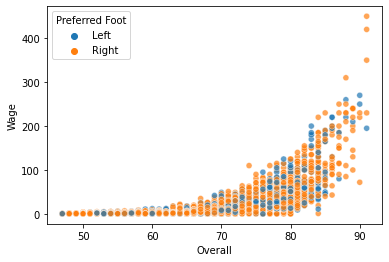

In [ ]:
sns.scatterplot(data=fifa, x="Overall", y="Wage", hue="Preferred Foot", alpha=.7)

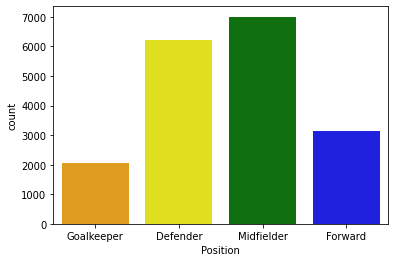

In [ ]:
# let's create FIFA's classical colors for main positions then count the number of players by their position
pos_colors = ["orange", "yellow", "green", "blue"]
sns.countplot(data=fifa, x="Position", palette=pos_colors)

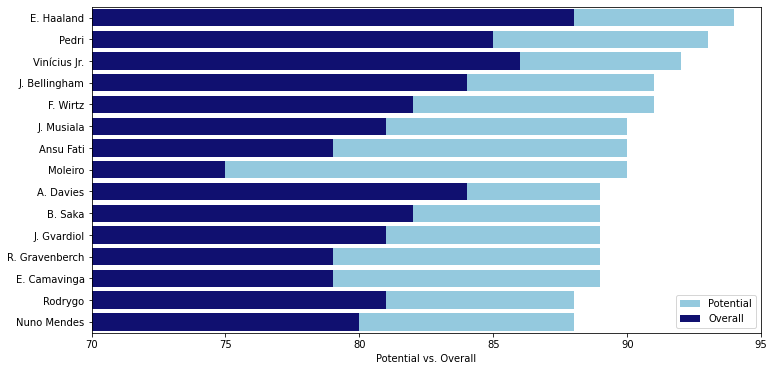

In [ ]:
# let's take a look at the top 15 youngsters in FIFA 23
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=fifa[fifa["Age"] <= 21].nlargest(15, "Potential"), x="Potential", y="Known As", color="skyblue", label="Potential")
sns.barplot(data=fifa[fifa["Age"] <= 21].nlargest(15, "Potential"), x="Overall", y="Known As", color="navy", label="Overall")
ax.set(xlim=(70,95), xlabel="Potential vs. Overall", ylabel="")
ax.legend(loc="lower right", frameon=True)

Let's create the same graph but a little bit stylish (and more informative).

In [ ]:
# but first, create the top 20 under-21 data frame to reduce messiness
u21 = fifa[fifa["Age"] <= 21].nlargest(15, "Potential")

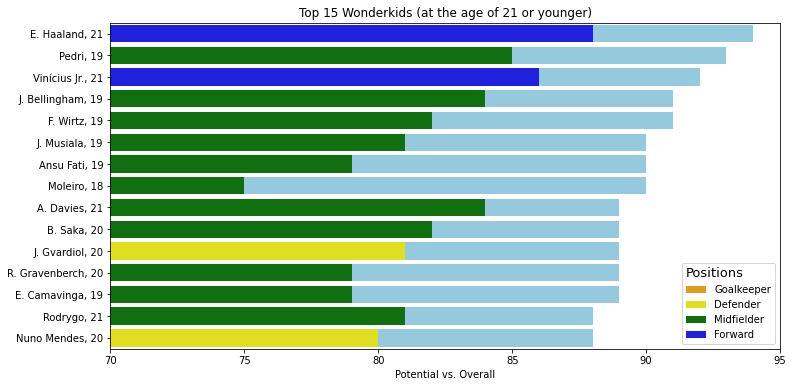

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=u21, x="Potential", y=u21[["Known As","Age"]].astype(str).agg(', '.join, axis=1), color="skyblue")
sns.barplot(data=u21, x="Overall", y=u21[["Known As","Age"]].astype(str).agg(', '.join, axis=1), hue="Position", palette=pos_colors, dodge=False)
ax.set(title="Top 15 Wonderkids (at the age of 21 or younger)", xlim=(70,95), xlabel="Potential vs. Overall", ylabel="")
ax.legend(title="Positions", title_fontsize=13,loc="lower right", frameon=True)._legend_box.align = "left"

### Visualizing two quantitative variables

`relplot()` can be used for relational plots such as scatter plots or line plots.

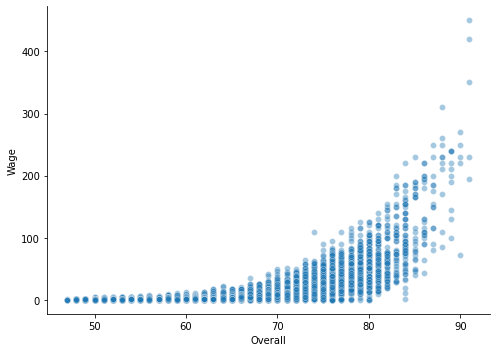

In [ ]:
sns.relplot(data=fifa, x="Overall", y="Wage",
            kind="scatter", alpha =.4, aspect=7/5)
# default kind is scatter. Other option is "line".

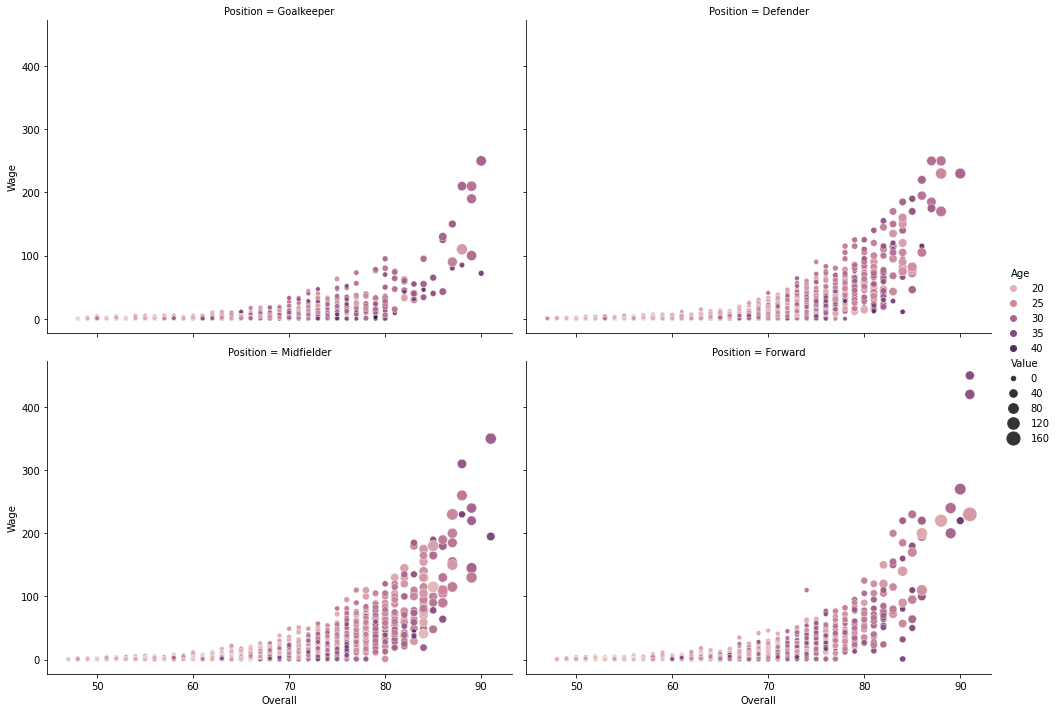

In [ ]:
sns.relplot(data=fifa, x="Overall", y="Wage",
            col="Position", col_wrap=2,
            hue="Age",size="Value",sizes=(20,200), aspect=7/5)